# Airbnb Euopean Cities Maps: Paris

In [101]:
# Shapefile: https://data.metabolismofcities.org/library/maps/38838/view/

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

import os
os_files = os.listdir("/Users/zhanebennett/Downloads/archive")

dfs = []
path = "/Users/zhanebennett/Downloads/archive"

for file in os_files:
    df = pd.read_csv(os.path.join(path, file))
    df['City'] = file.split('_')[0]
    df['Time_of_week'] = file.split('_')[1][:-4]
    dfs.append(df) #list of dataframes

In [56]:
df_combined = pd.concat(dfs)
df_combined.drop(columns=df_combined.columns[0], axis=1, inplace=True)

df = df_combined.copy()

In [102]:
%%capture
!pip install geopandas
!pip install descartes
!pip install matplotlib

import fiona; fiona.supported_drivers

### PARIS

In [38]:
#Only Paris data
#df = df_combined.copy()


In [58]:
df.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat       City  \
0         4.166708   98.253896         6.846473  4.90569  52.41772  amsterdam   
1        33.421209  837.280757        58.342928  4.90005  52.37432  amsterdam   
2         3.985908   95.386955         6.646700  4.97512  52.36103  amsterdam   
3        26.119108  875.033098        60.973565  4.89417  52.37663  amsterdam   
4        29.272733  815.305740        56.811677  4.90051  52.37508  amsterdam   

  Time_of_week  
0     weekdays  
1     weekdays  
2     weekdays  
3     weekdays  
4     weekdays  

[5 rows x 21 columns]

In [59]:
import geopandas as gpd
filename = "paris.geojson"
file = open(filename)
df = gpd.read_file(file)

# read the shapefile of Paris
paris_shp = gpd.read_file("paris.geojson")

# display the first 5 rows of the data
print(paris_shp.head())

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [60]:
df['geometry']

GeoSeries([], Name: geometry, dtype: geometry)

In [61]:
# read the shapefile of Paris
paris_shp = gpd.read_file("paris.geojson")

# display the first 5 rows of the data
print(paris_shp.head())

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [62]:
paris_shp = gpd.read_file("folder/arrondissements.shp")

In [63]:
print(paris_shp)

        n_sq_ar  c_ar  c_arinsee         l_ar              l_aroff  \
0   750000015.0  15.0    75115.0  15Ã¨me Ardt            Vaugirard   
1   750000009.0   9.0    75109.0   9Ã¨me Ardt               OpÃ©ra   
2   750000018.0  18.0    75118.0  18Ã¨me Ardt    Buttes-Montmartre   
3   750000006.0   6.0    75106.0   6Ã¨me Ardt           Luxembourg   
4   750000012.0  12.0    75112.0  12Ã¨me Ardt              Reuilly   
5   750000017.0  17.0    75117.0  17Ã¨me Ardt  Batignolles-Monceau   
6   750000020.0  20.0    75120.0  20Ã¨me Ardt        MÃ©nilmontant   
7   750000001.0   1.0    75101.0     1er Ardt               Louvre   
8   750000002.0   2.0    75102.0   2Ã¨me Ardt               Bourse   
9   750000019.0  19.0    75119.0  19Ã¨me Ardt      Buttes-Chaumont   
10  750000005.0   5.0    75105.0   5Ã¨me Ardt            PanthÃ©on   
11  750000008.0   8.0    75108.0   8Ã¨me Ardt             ÃlysÃ©e   
12  750000016.0  16.0    75116.0  16Ã¨me Ardt                Passy   
13  750000010.0  10.

<AxesSubplot:>

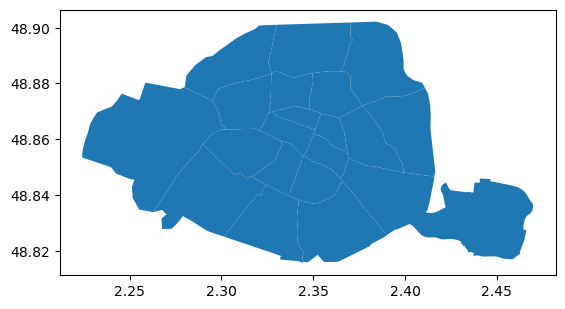

In [47]:
paris_shp.plot()

In [64]:
zipfile = "arr.zip"
states = gpd.read_file(zipfile)

states['geometry']

0     POLYGON ((2.29932 48.85217, 2.30088 48.85118, ...
1     POLYGON ((2.33978 48.88203, 2.33982 48.88202, ...
2     POLYGON ((2.36580 48.88554, 2.36469 48.88437, ...
3     POLYGON ((2.34459 48.85405, 2.34428 48.85375, ...
4     POLYGON ((2.41388 48.83357, 2.41401 48.83357, ...
5     POLYGON ((2.29517 48.87396, 2.29504 48.87378, ...
6     POLYGON ((2.41277 48.87547, 2.41284 48.87524, ...
7     POLYGON ((2.32801 48.86992, 2.32997 48.86851, ...
8     POLYGON ((2.35152 48.86443, 2.35095 48.86341, ...
9     POLYGON ((2.38943 48.90122, 2.39014 48.90108, ...
10    POLYGON ((2.36443 48.84614, 2.36484 48.84584, ...
11    POLYGON ((2.32584 48.86956, 2.32569 48.86954, ...
12    POLYGON ((2.27427 48.87837, 2.27749 48.87796, ...
13    POLYGON ((2.36469 48.88437, 2.36485 48.88436, ...
14    POLYGON ((2.36851 48.85573, 2.36900 48.85374, ...
15    POLYGON ((2.33381 48.84061, 2.33673 48.83965, ...
16    POLYGON ((2.39624 48.85415, 2.39708 48.85308, ...
17    POLYGON ((2.37491 48.83801, 2.37698 48.836

In [65]:
df = df_combined.copy()
df = df[df['City'] == 'paris']

In [69]:
crs = {'init':'epsg:4326'}
geometry_paris = [Point(xy) for xy in zip(df['lng'], df['lat'])]

In [70]:
geometry_paris[:3]

[<POINT (2.359 48.868)>, <POINT (2.354 48.863)>, <POINT (2.36 48.864)>]

In [71]:
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry_paris) #specify the geometry list we created
geo_df.head()

/Users/zhanebennett/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


realSum        room_type  room_shared  room_private  person_capacity  \
0  536.396682  Entire home/apt        False         False              5.0   
1  290.101594     Private room        False          True              2.0   
2  445.754497  Entire home/apt        False         False              4.0   
3  211.343089     Private room        False          True              2.0   
4  266.334234  Entire home/apt        False         False              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      0    1                 9.0   
1               True      0    0                10.0   
2              False      0    1                10.0   
3              False      0    0                10.0   
4               True      0    0                 9.0   

   guest_satisfaction_overall  ...  metro_dist   attr_index  attr_index_norm  \
0                        89.0  ...    0.212346   390.776775        19.001549   
1                        97.0  ...    0.193710   518.478270        25.211044   
2                       100.0  ...    0.294343   432.689942        21.039580   
3                        94.0  ...    0.234740   444.555284        21.616533   
4                        88.0  ...    0.055052  1013.458689        49.279502   

    rest_index  rest_index_norm      lng       lat   City  Time_of_week  \
0  1030.738507        47.550371  2.35900  48.86800  paris      weekends   
1  1218.658866        56.219575  2.35385  48.86282  paris      weekends   
2  1069.894793        49.356741  2.36023  48.86375  paris      weekends   
3   902.856370        41.650870  2.31714  48.87475  paris      weekends   
4  1348.063511        62.189313  2.33408  48.85384  paris      weekends   

                   geometry  
0  POINT (2.35900 48.86800)  
1  POINT (2.35385 48.86282)  
2  POINT (2.36023 48.86375)  
3  POINT (2.31714 48.87475)  
4  POINT (2.33408 48.85384)  

[5 rows x 22 columns]

In [75]:
import numpy as np
outliers = geo_df[['realSum']].dropna()
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [80]:
outliers = geo_df[['cleanliness_rating']].dropna()
outliers2 = geo_df.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#outliers2.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)
outliers2.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  536.396682  Entire home/apt        False         False              5.0   
1  290.101594     Private room        False          True              2.0   
2  445.754497  Entire home/apt        False         False              4.0   
3  211.343089     Private room        False          True              2.0   
4  266.334234  Entire home/apt        False         False              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      0    1                 9.0   
1               True      0    0                10.0   
2              False      0    1                10.0   
3              False      0    0                10.0   
4               True      0    0                 9.0   

   guest_satisfaction_overall  ...  metro_dist   attr_index  attr_index_norm  \
0                        89.0  ...    0.212346   390.776775        19.001549   
1                        97.0  ...    0.193710   518.478270        25.211044   
2                       100.0  ...    0.294343   432.689942        21.039580   
3                        94.0  ...    0.234740   444.555284        21.616533   
4                        88.0  ...    0.055052  1013.458689        49.279502   

    rest_index  rest_index_norm      lng       lat   City  Time_of_week  \
0  1030.738507        47.550371  2.35900  48.86800  paris      weekends   
1  1218.658866        56.219575  2.35385  48.86282  paris      weekends   
2  1069.894793        49.356741  2.36023  48.86375  paris      weekends   
3   902.856370        41.650870  2.31714  48.87475  paris      weekends   
4  1348.063511        62.189313  2.33408  48.85384  paris      weekends   

                   geometry  
0  POINT (2.35900 48.86800)  
1  POINT (2.35385 48.86282)  
2  POINT (2.36023 48.86375)  
3  POINT (2.31714 48.87475)  
4  POINT (2.33408 48.85384)  

[5 rows x 22 columns]

In [77]:
outliers2.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'City', 'Time_of_week', 'geometry'],
      dtype='object')

## Plotting Variables
- Price
- Room Type
- Room Shared
- Private Room
- Person Capacity
- Host is Superhost
- Multi
- Biz
- Cleanliness Rating
- Guest Satisfaction Overall
- Bedrooms
- Dist
- Metro Dist
- Time of Week

## Paris Price

<AxesSubplot:>

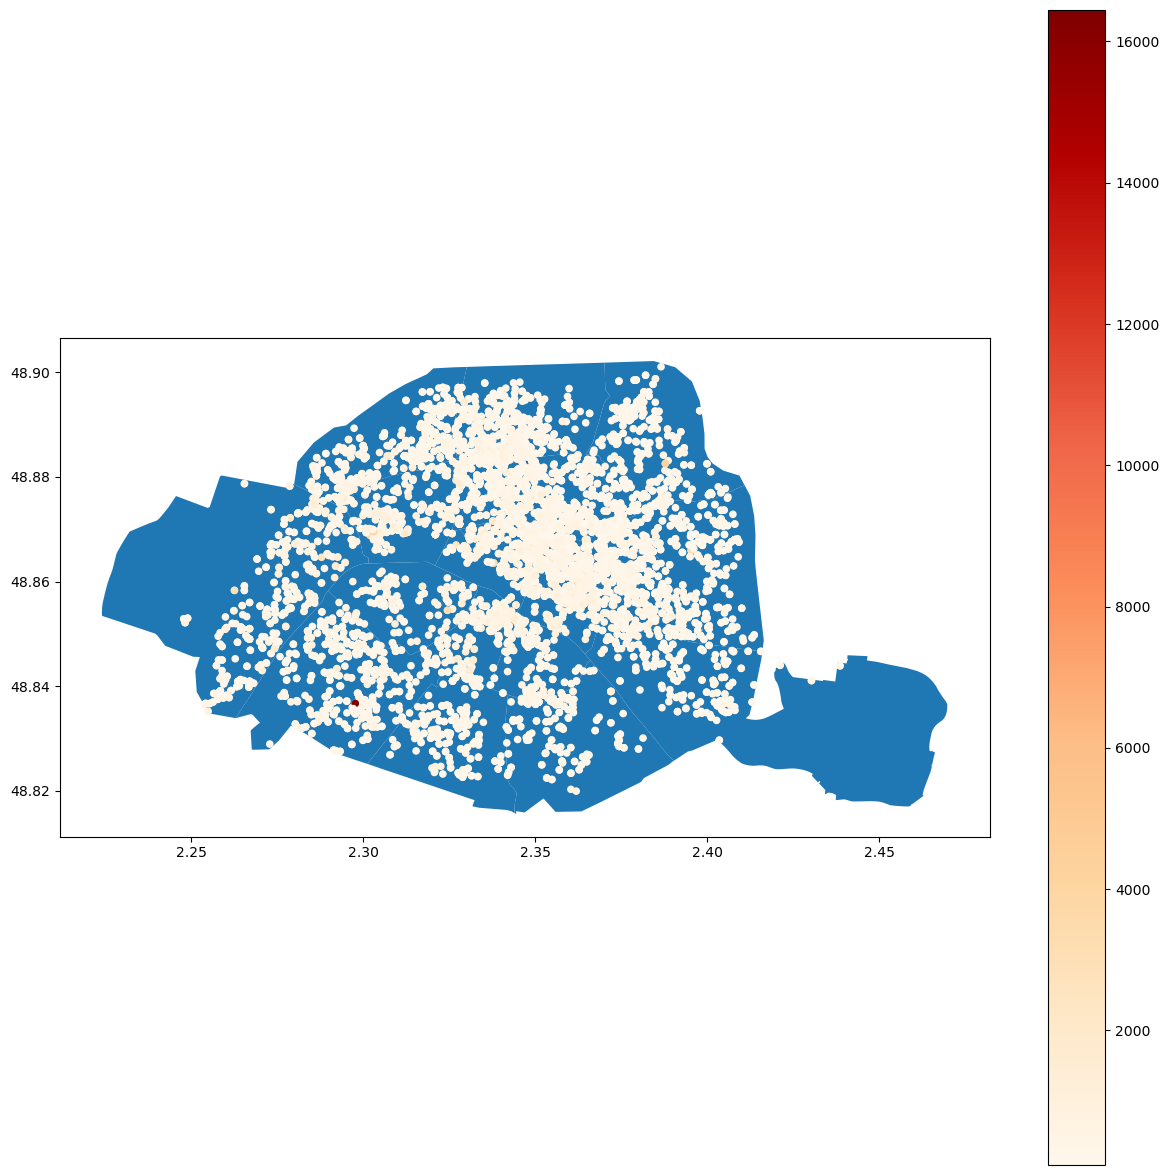

In [81]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['realSum'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)

## Paris Room Type

<AxesSubplot:>

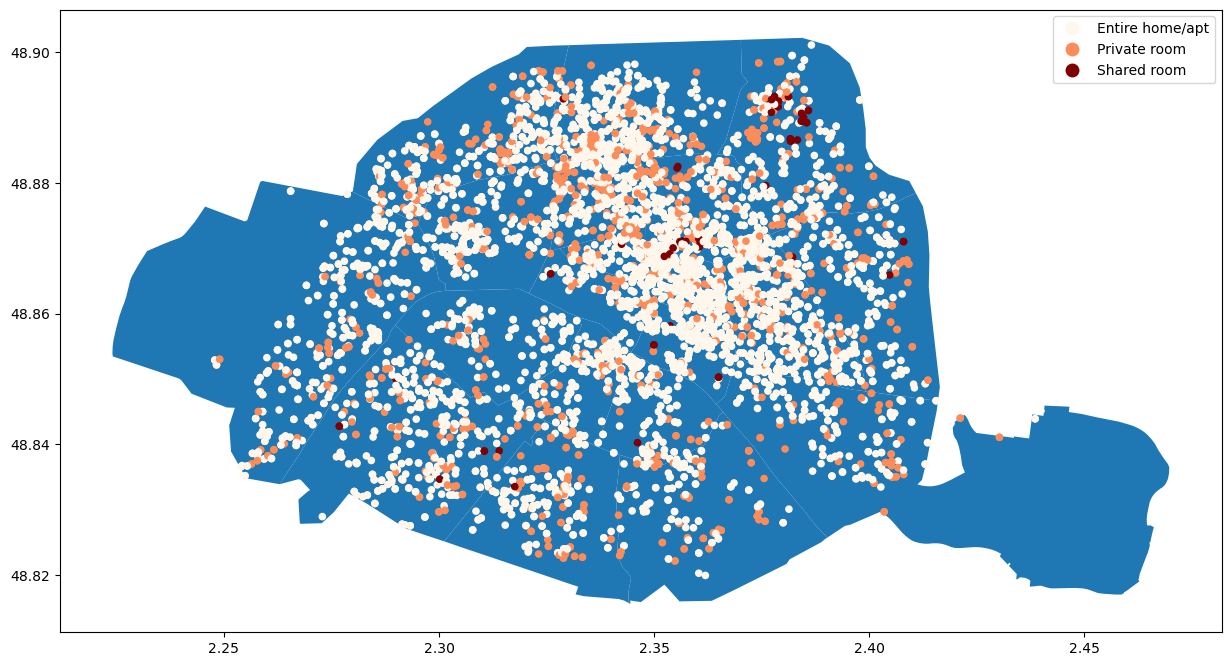

In [82]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['room_type'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)

<AxesSubplot:>

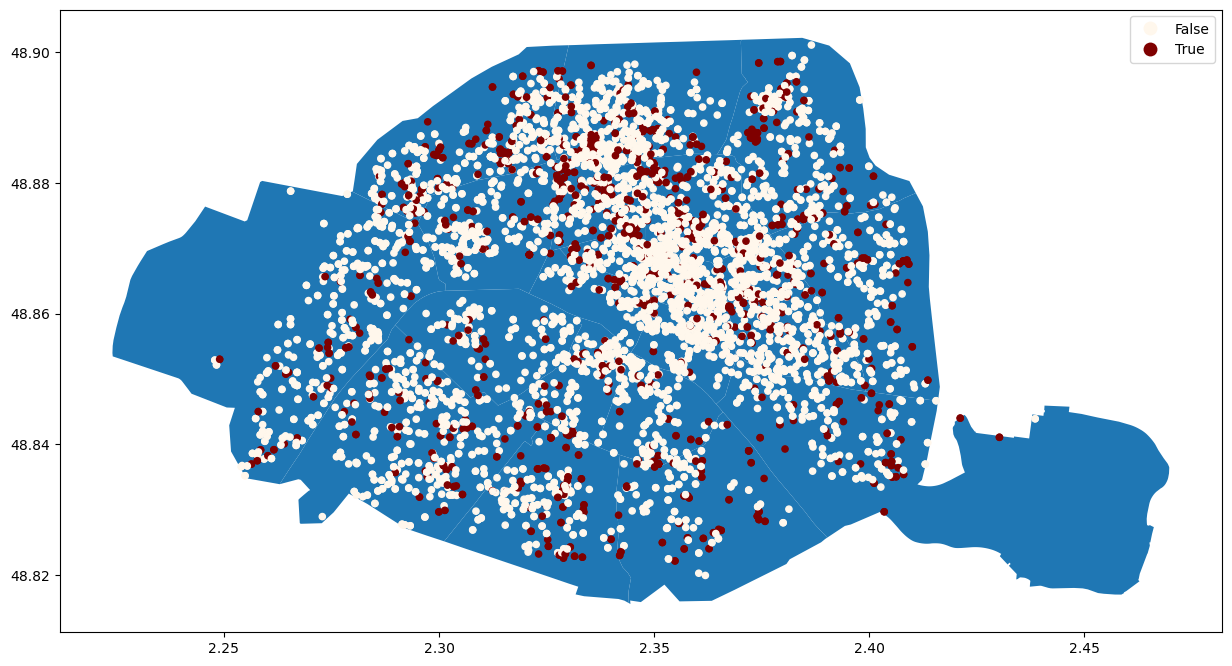

In [83]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['room_private'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)

<AxesSubplot:>

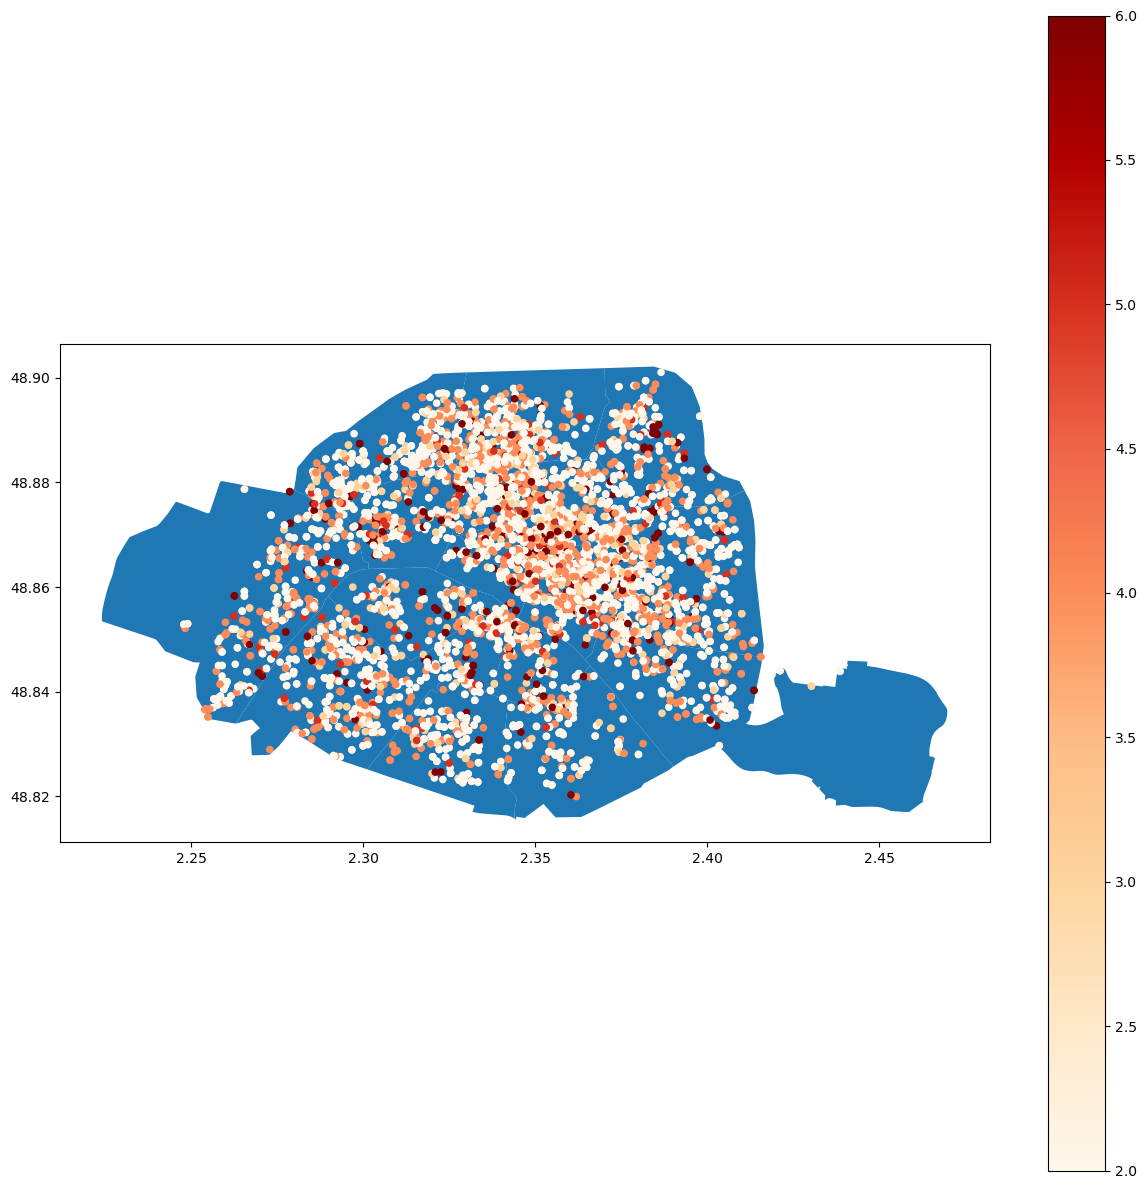

In [84]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['person_capacity'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)


<AxesSubplot:>

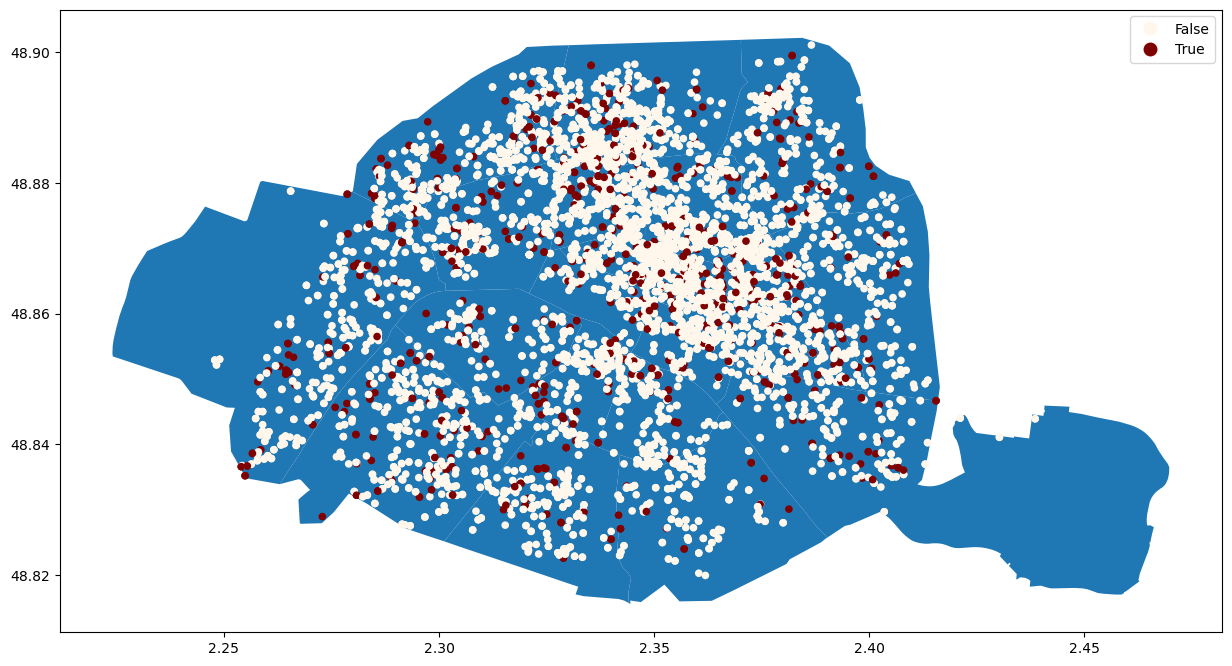

In [85]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['host_is_superhost'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)



<AxesSubplot:>

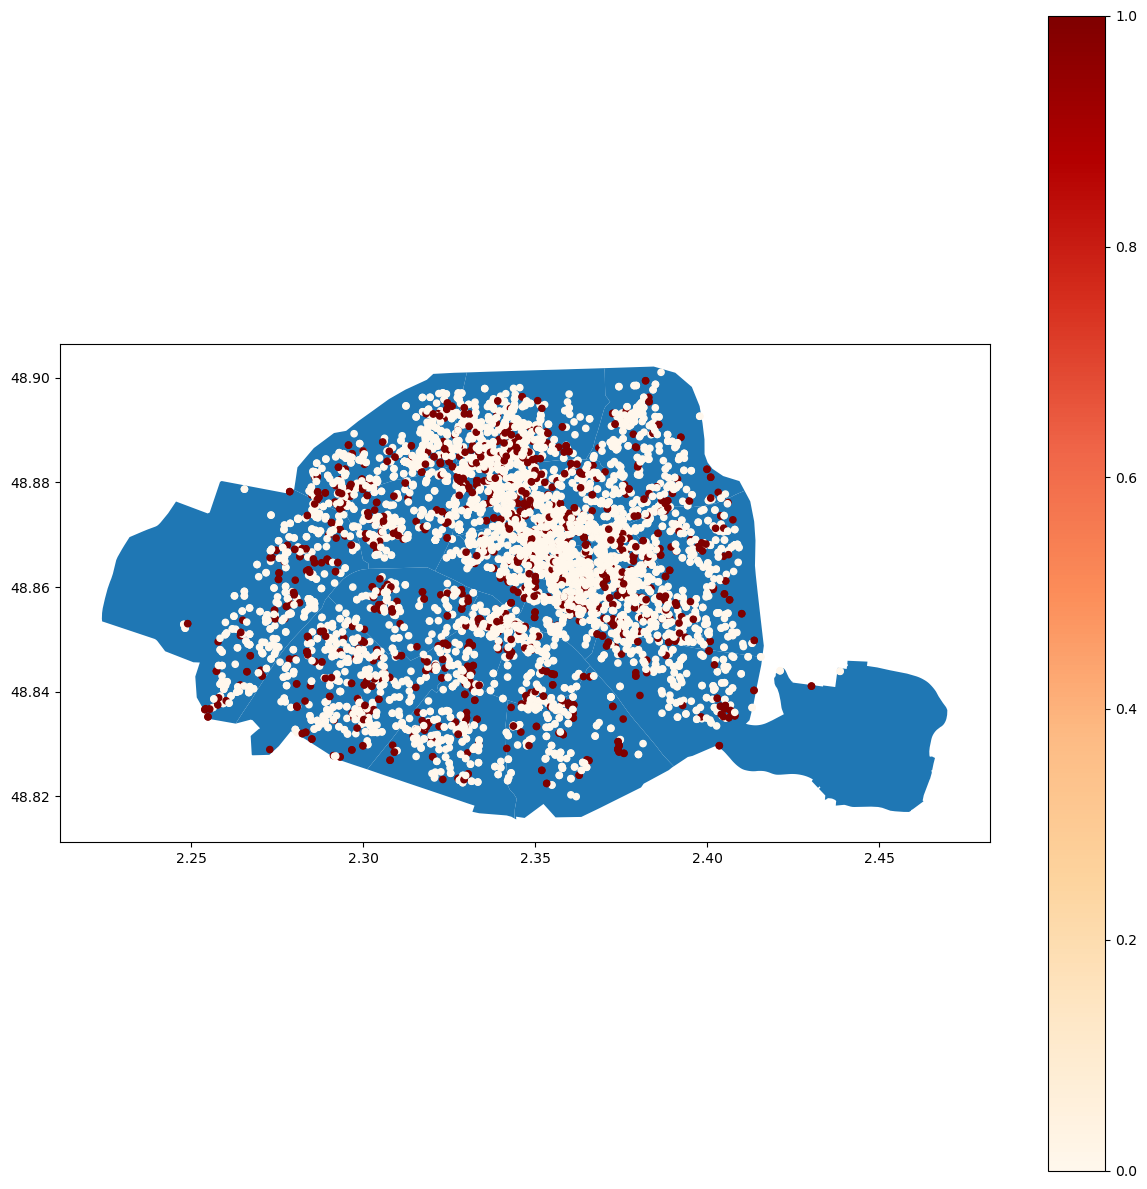

In [86]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['multi'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)



<AxesSubplot:>

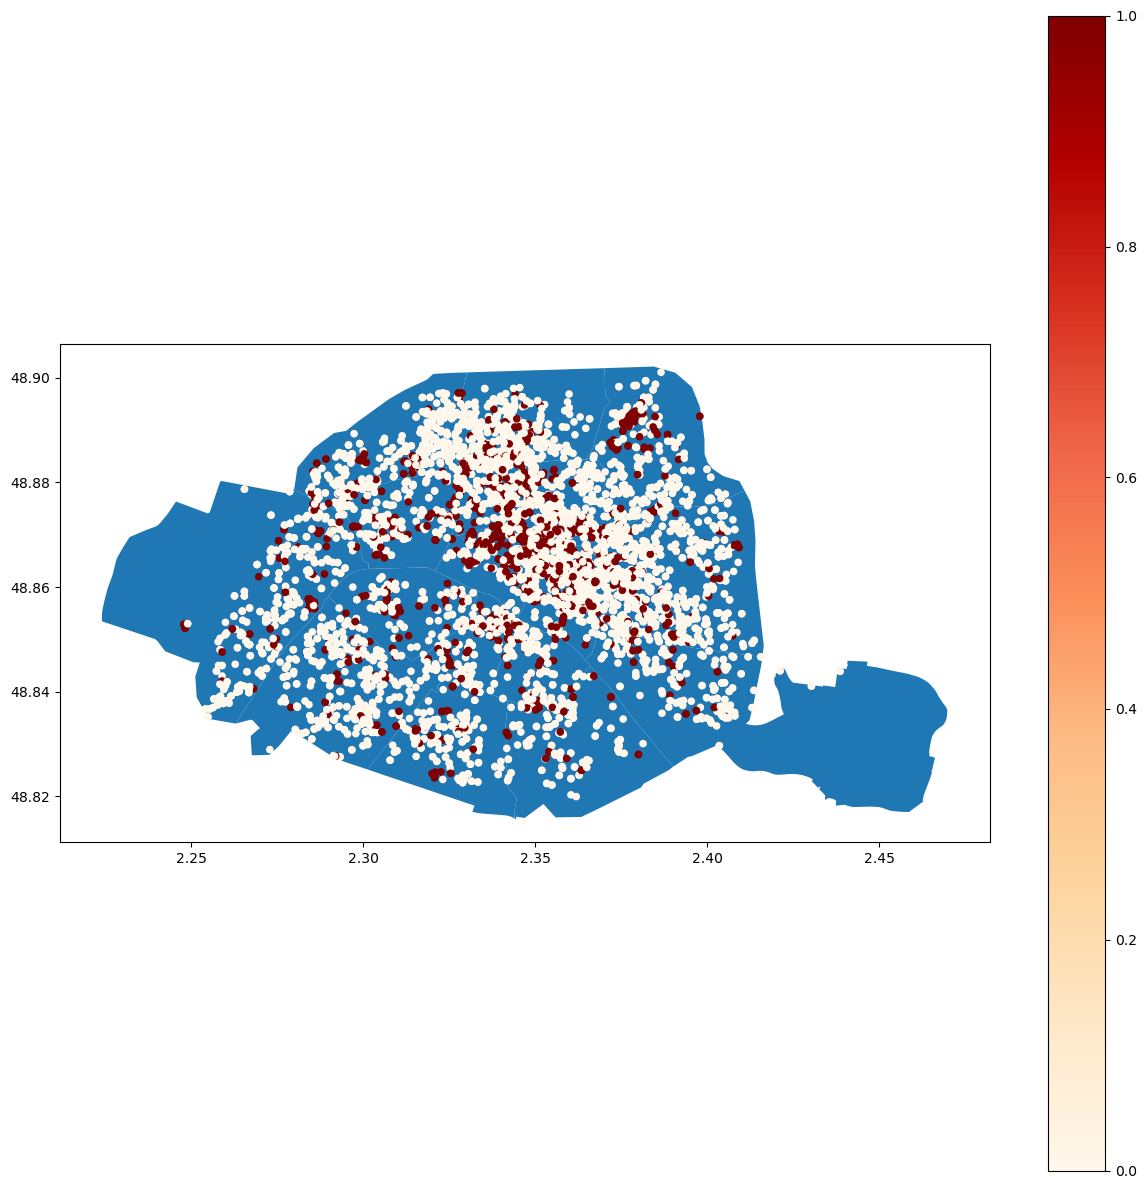

In [87]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['biz'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)

<AxesSubplot:>

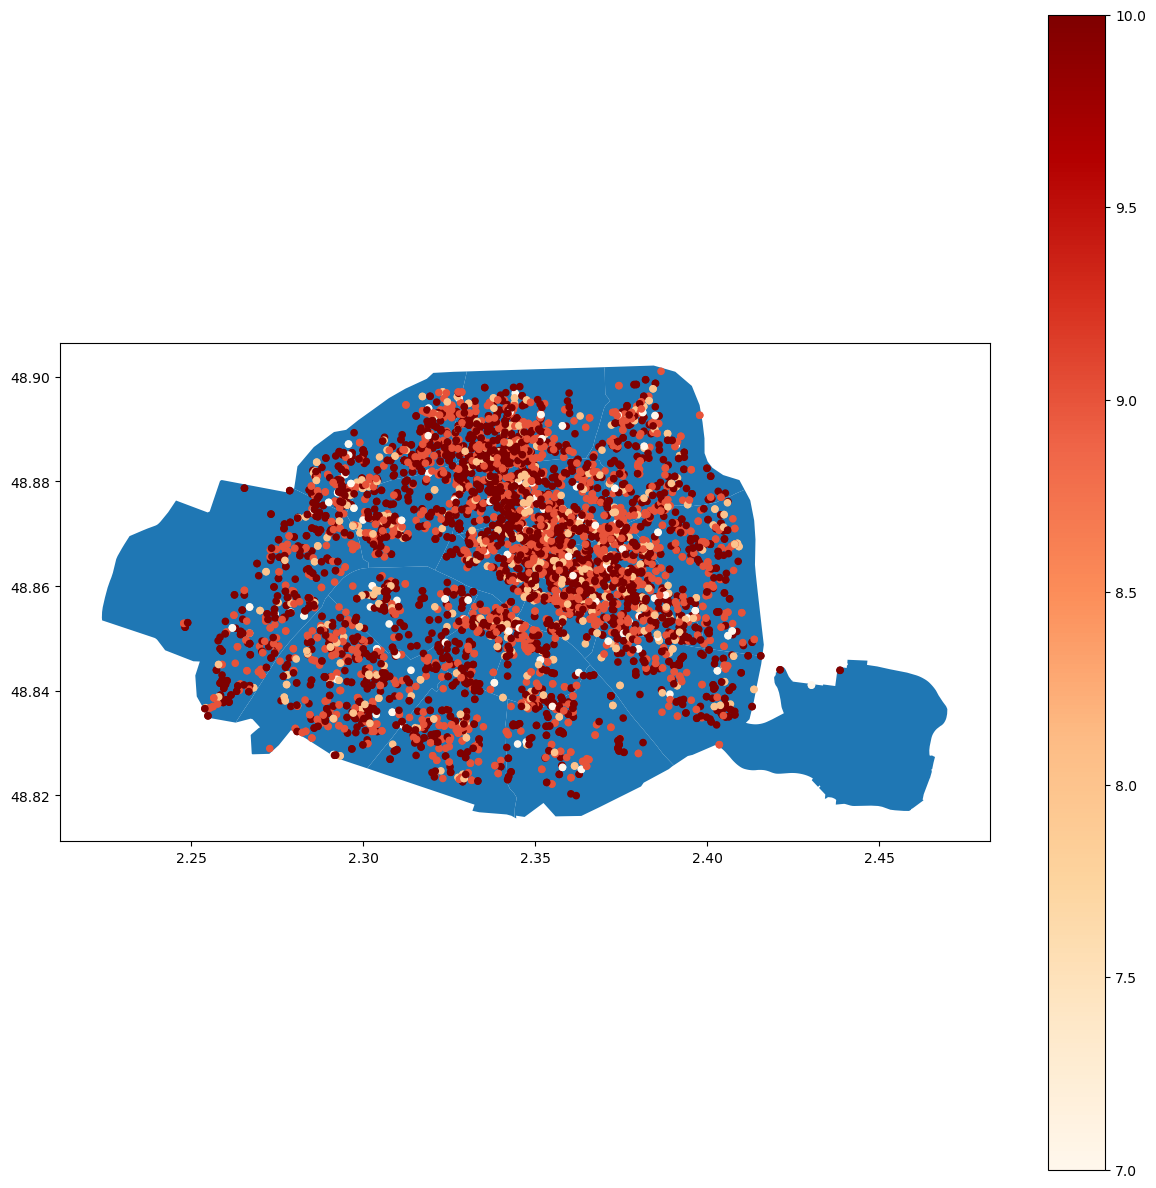

In [88]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['cleanliness_rating'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)



<AxesSubplot:>

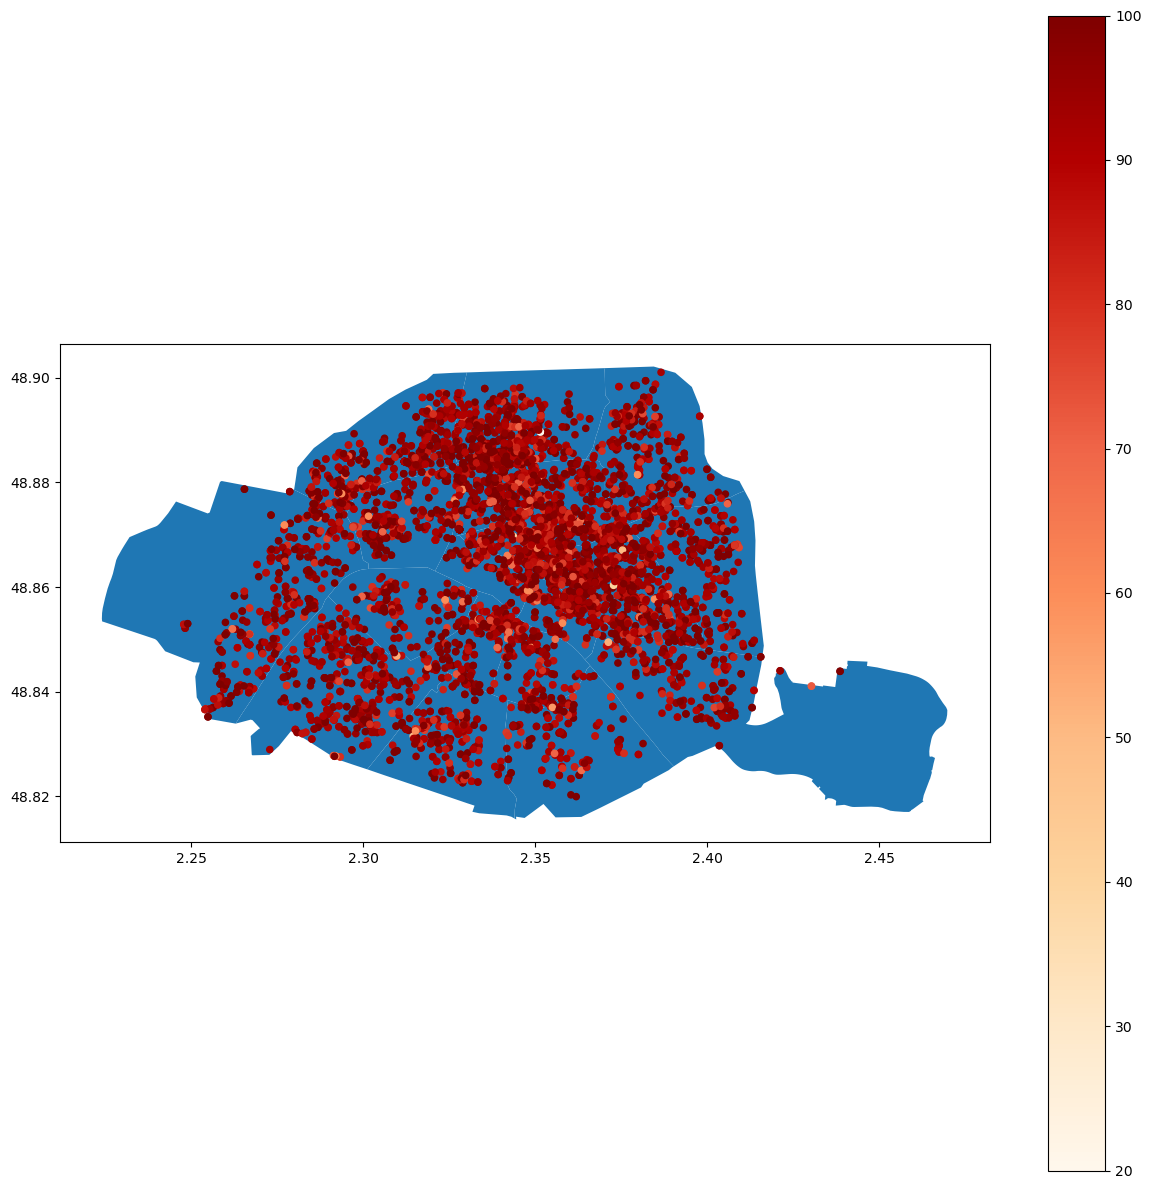

In [91]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['guest_satisfaction_overall'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)

<AxesSubplot:>

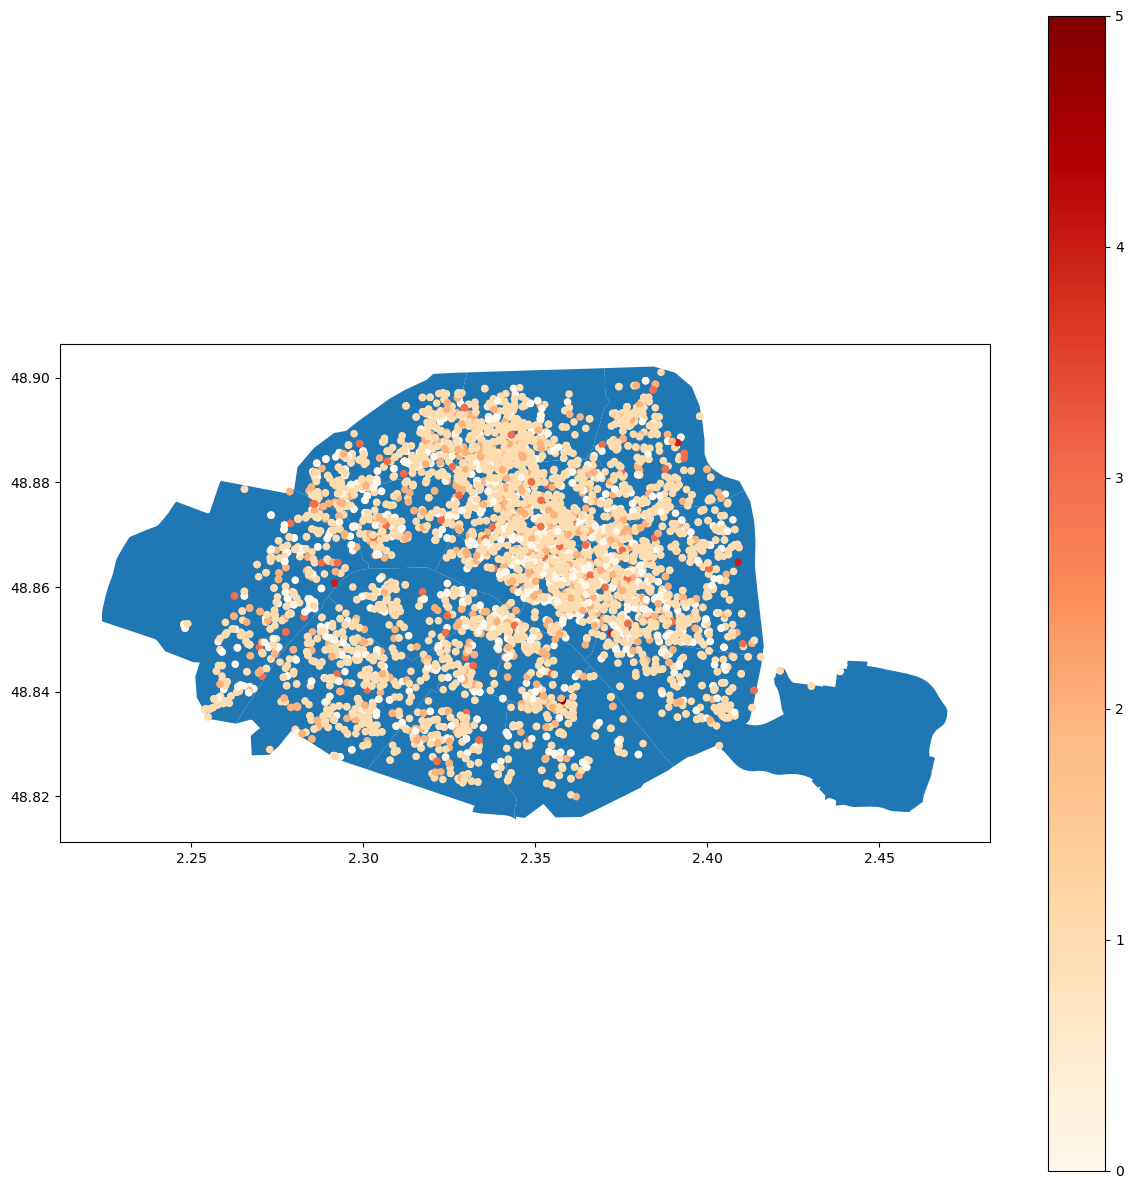

In [93]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['bedrooms'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)



<AxesSubplot:>

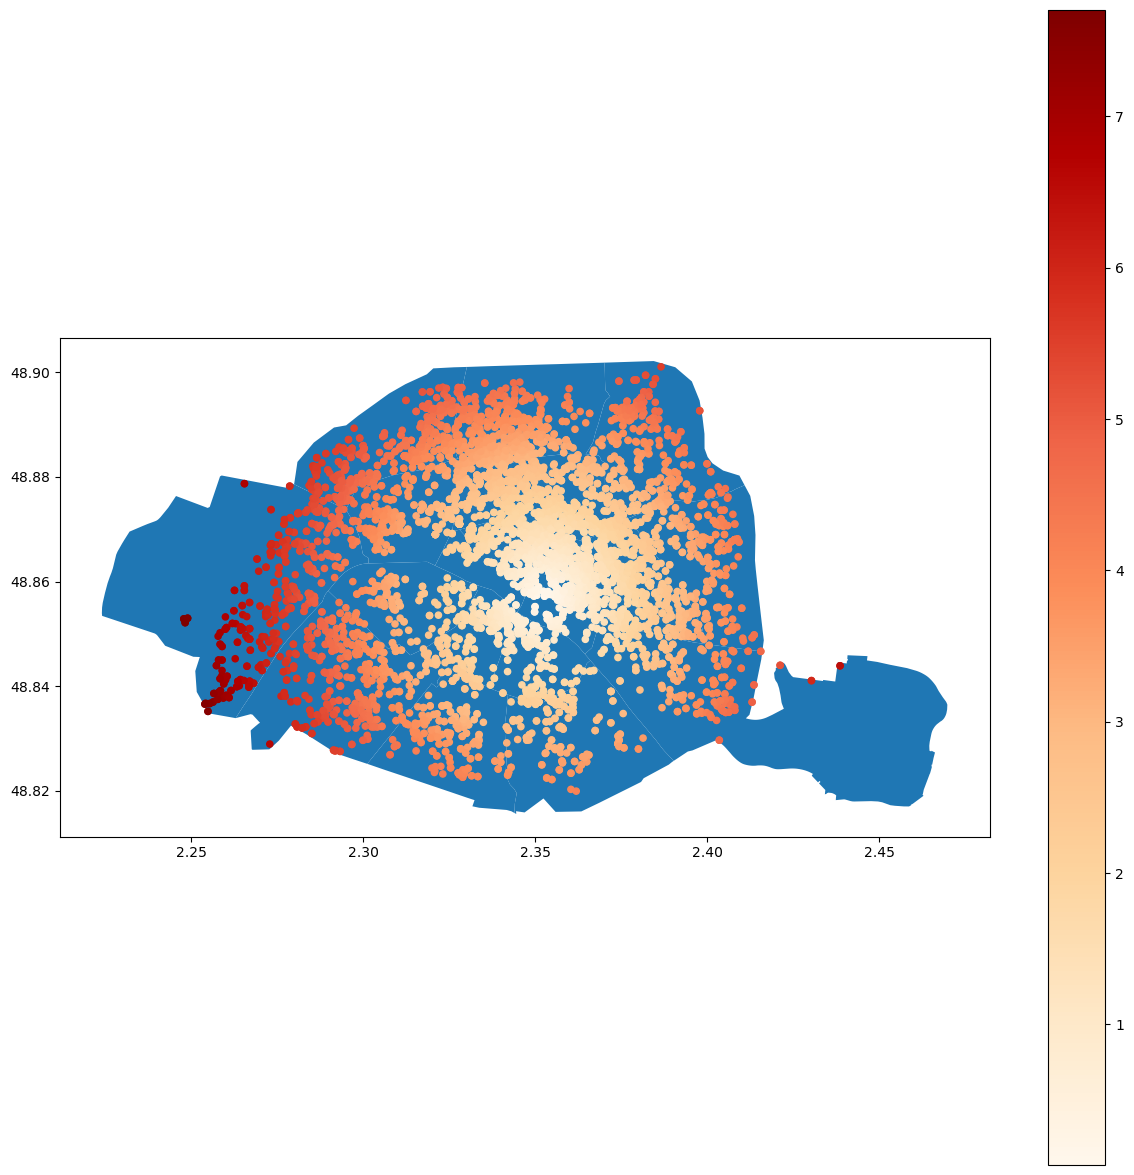

In [94]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['dist'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)



<AxesSubplot:>

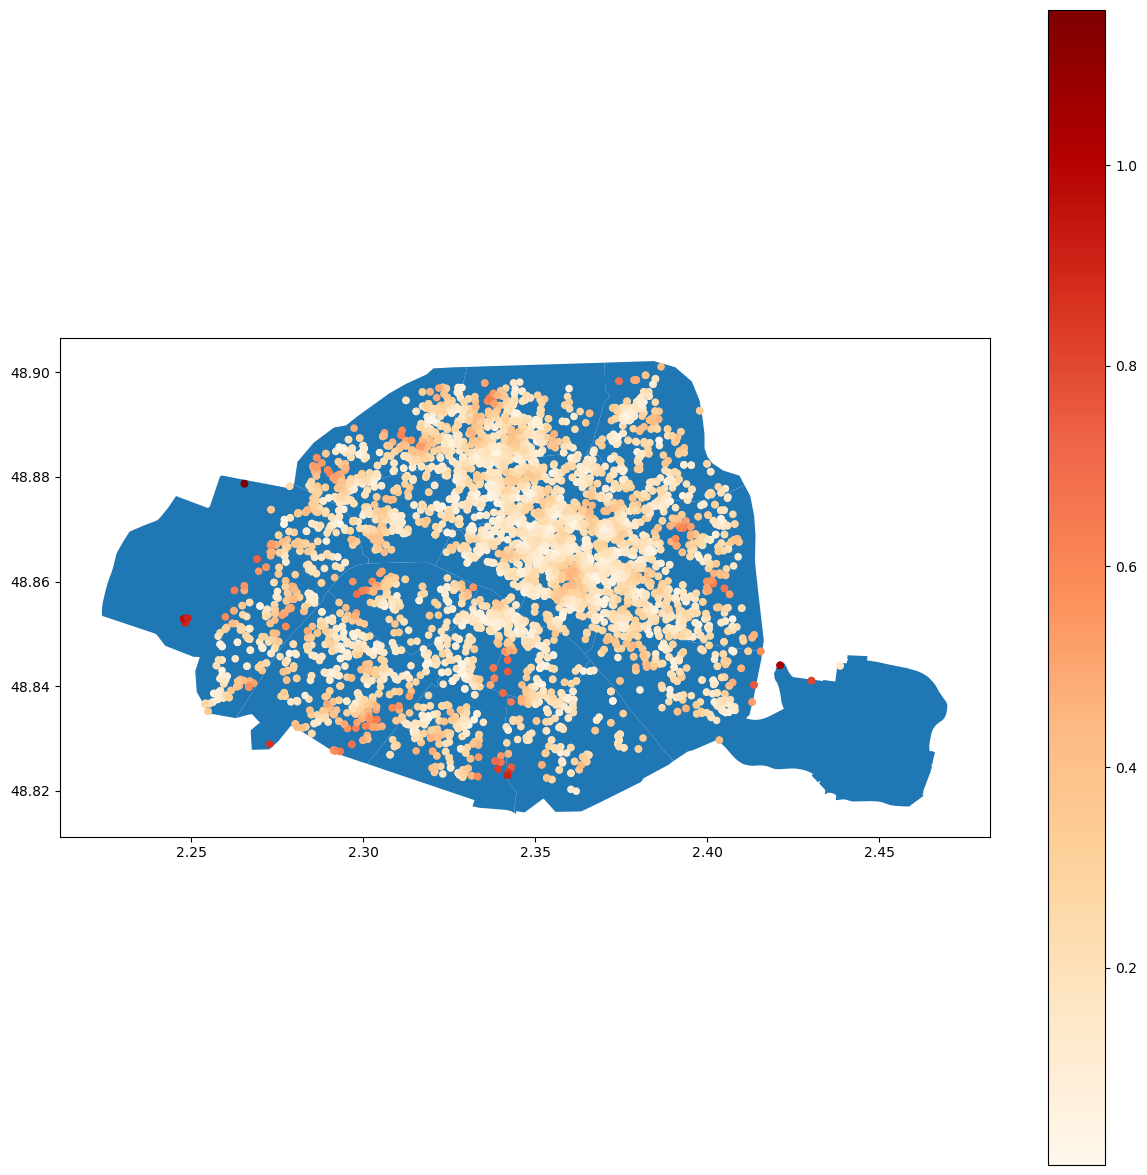

In [95]:
fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['metro_dist'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)


<AxesSubplot:>

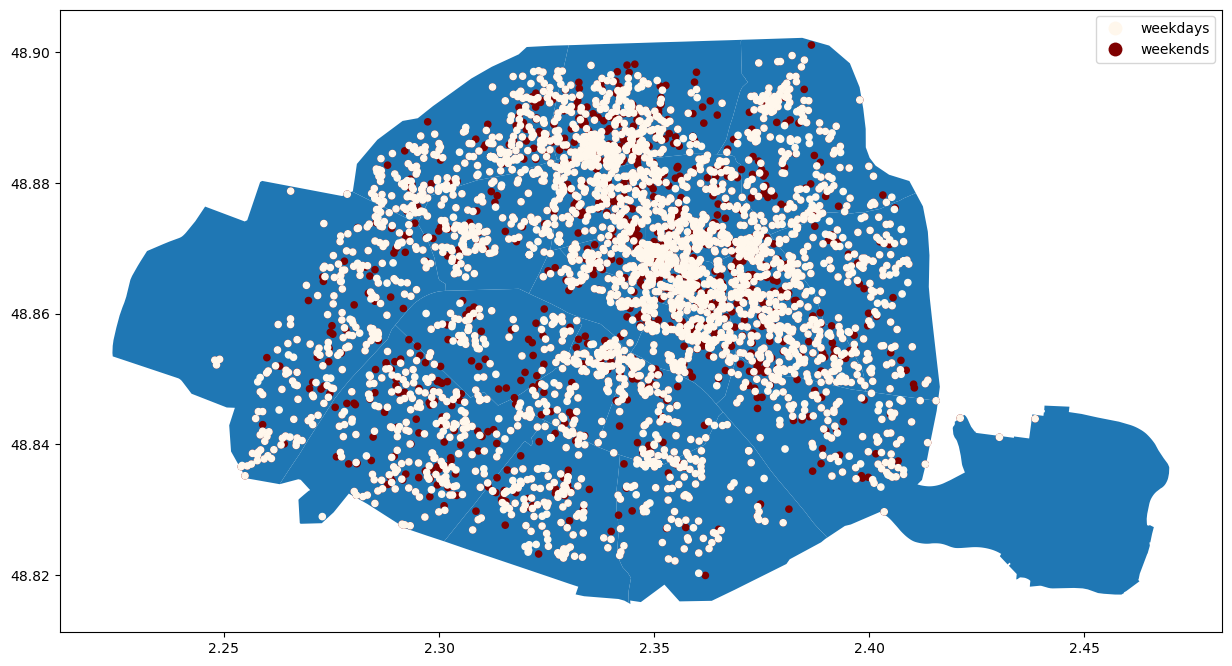

In [97]:

fig, ax = plt.subplots(figsize=(15,15))
paris_shp.plot(ax=ax)
outliers2.plot(ax=ax, 
                                       markersize=20, 
                                       column= outliers2['Time_of_week'],
                                       cmap= 'OrRd',
                                       #color='blue', 
                                       marker='o', 
                                       #label='Neg',
                                    legend=True)